<a href="https://colab.research.google.com/github/sans1012/Insurance-Premuim-Prediction/blob/main/Insurance_premium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Insurance%20Premium.csv", index_col=['ID'])

In [3]:
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Premium
ID,,,,,,,
1,19,female,27.900,0,yes,south,16885
2,18,male,33.770,1,no,east,1726
3,28,male,33.000,3,no,east,4449
4,33,male,22.705,0,no,west,21984
5,32,male,28.880,0,no,west,3867


In [4]:
df.describe()

,Age,BMI,Children,Premium
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.414798
std,14.049960,6.098187,1.205493,12110.012882
min,18.000000,15.960000,0.000000,1122.000000
25%,27.000000,26.296250,0.000000,4740.000000
50%,39.000000,30.400000,1.000000,9382.000000
75%,51.000000,34.693750,2.000000,16640.000000
max,64.000000,53.130000,5.000000,63770.000000


## We see the mean is not in same range for all the columns and the std is not equal/around 0: scaling is required

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Gender    1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Premium   1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 83.6+ KB


In [6]:
df.isnull().sum()

Age         0
Gender      0
BMI         0
Children    0
Smoker      0
Region      0
Premium     0
dtype: int64

In [7]:
df['Region'].unique()

array(['south', 'east', 'west', 'north'], dtype=object)

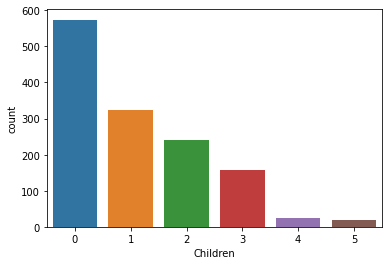

In [8]:
sns.countplot(data= df, x="Children")

There are many people with no children and people with 1 and 2 are almost same. 

In [9]:
fig = px.scatter(df, x="BMI", y="Premium",color="Region", title='BMI VS Premium')
fig.show()

From the above scatter plot:

                (i) The  region is in no way a deciding factor for the value of premium
                (ii) People in age group 15-35 have the avg premium value below 25K
                (iii) People older than 35 have high premium

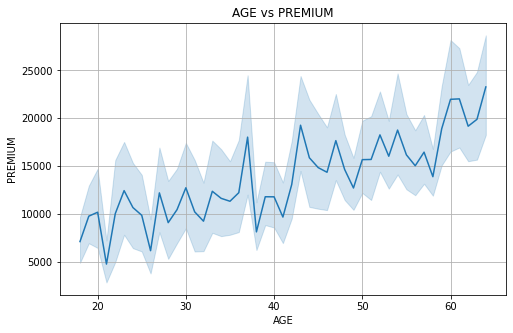

In [10]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Age', y='Premium')
plt.xlabel("AGE")
plt.ylabel("PREMIUM")
plt.title("AGE vs PREMIUM")
plt.grid()
plt.show()

Premium increases as the age of the person is increases.

In [11]:
fig=px.scatter(df, x='Gender', y='Premium', color='Smoker', width=600, height=400)
fig.show()

In both of the gender groups, it is commonly noted that people who are smoker have high premium due to possible diseases and problems they can get by smoking while in other group who are not smoker: people have low premium

In [12]:
le=LabelEncoder()
df=df.apply(le.fit_transform)
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Premium
ID,,,,,,,
1,1,0,197,0,1,2,964
2,0,1,350,1,0,0,49
3,10,1,331,3,0,0,288
4,15,1,73,0,0,3,1056
5,14,1,223,0,0,3,237


## GENDER
            1: female
            0: male
## SMOKER
            1: Yes
            0: No
            
## Region
            0:East
            1:North
            2:South
            3:West

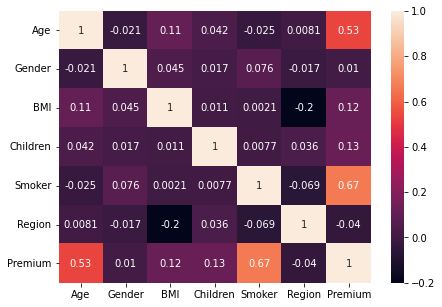

In [13]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       1338 non-null   int64
 1   Gender    1338 non-null   int64
 2   BMI       1338 non-null   int64
 3   Children  1338 non-null   int64
 4   Smoker    1338 non-null   int64
 5   Region    1338 non-null   int64
 6   Premium   1338 non-null   int64
dtypes: int64(7)
memory usage: 115.9 KB


In [15]:
scaler= StandardScaler()
X=df.drop(columns= ['Premium',"Region"], axis=0)
X= pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

In [16]:
Y=df['Premium']

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [19]:
accuracy_matrix=pd.DataFrame(index= ["Mean Absolute Error",
                        "Mean Square Error",
                        "Residual Error(RSS)",
                        "Root mean Square",
                        "R2 Score (CoD)"])


In [20]:
def reg_model(model):
    m=model()
    m.fit(X_train, y_train)
    y_pred=m.predict(X_test)
    accuracy_matrix[str(model).split(".")[-1][:-2]]=[round(mean_absolute_error(y_test, y_pred),3),
                             round(mean_squared_error(y_test, y_pred),3),
                             round(np.sum(np.square(y_test- y_pred)),3), 
                             round(np.sqrt(mean_squared_error(y_test, y_pred)),3),
                             round(r2_score(y_test, y_pred),3)]

In [21]:
reg_model(LinearRegression)
reg_model(Lasso)
reg_model(Ridge)
reg_model(RandomForestRegressor)
reg_model(KNeighborsRegressor)

In [22]:
accuracy_matrix

,LinearRegression,Lasso,Ridge,RandomForestRegressor,KNeighborsRegressor
Mean Absolute Error,122.778,123.047,122.875,81.973,98.696
Mean Square Error,30860.228,30903.076,30865.014,25236.449,30034.681
Residual Error(RSS),8270541.057,8282024.438,8271823.812,6763368.393,8049294.480
Root mean Square,175.671,175.793,175.684,158.860,173.305
R2 Score (CoD),0.793,0.792,0.793,0.830,0.798


Random forest regressor have the highest R square value. Plotting visualization grraph

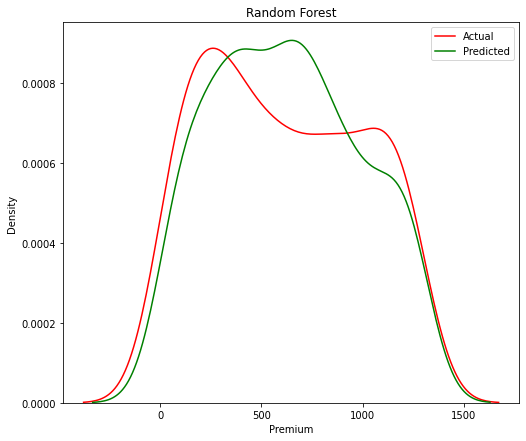

In [23]:
model_random= RandomForestRegressor()
model_random.fit(X_train, y_train)
y_pred_rf=model_random.predict(X_test)

plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
ax1=sns.distplot(y_test, hist=False, color='r', label="Actual")
sns.distplot(y_pred_rf, hist=False, color='g', ax=ax1, label="Predicted")
plt.legend(labels=["Actual","Predicted"])
plt.title("Random Forest")
plt.show()

### Testing

In [24]:
enter= [int(input("Enter Age: ")), 
        input("Enter Gender: "), 
        float(input("Enter BMI: ")), 
        int(input("Enter number of childern  you have")),
        input("Are you a smoker: (Y/N): ")]

if enter[1]=="F":
    enter[1]=0
elif enter[1]=="M":
    enter[1]==1
    
if enter[-1]=="N":
    enter[-1]=0
else:
    enter[-1]=1


print("Expected Premium price is : ", model_random.predict([enter])[0])

Enter Age: 20
Enter Gender: F
Enter BMI: 24
Enter number of childern  you have0
Are you a smoker: (Y/N): N
Expected Premium price is :  945.34
